<a href="https://colab.research.google.com/github/AravDe/AravDe.github.io/blob/main/L01_Greedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [L01: Implementing Greedy TSP](https://docs.google.com/document/d/1JA_CWBXPN6whvJAemnJLvtYJ3Pbk84dTUolWO_QqosA/edit?usp=sharing)
Written by Dr. Jan Pearce, Berea College

Complete the code by meeting all linked requirements and fixing all FIXMEs

## Your Name: Arav De

**SUMMARY**: A brief summary description of the design and implementation, including how much your initial design plan evolved, the final result you achieved and the amount of time you spent as a programmer or programmers in accomplishing these results. This should be no more than two paragraphs.

FIXME

**PERSONNEL**: A description of who you worked with and on what sections.  It is expected that all collaboration is done as pair programming together. Also, note these collaborations in the code section itself.

FIXME

**CHALLENGES**: Descriptions of the largest challenges you overcame and what made them challenging.

FIXME

**INNOVATIONS**: Any innovations that were not specifically required by the assignment. These are not required, but should be highlighted if included.

FIXME

**TESTING**: Describe how you tested this work.

FIXME

**ERRORS**: A list in bulleted form of all known errors and deficiencies.

FIXME

**COMMENTS**: A paragraph or so of your own comments on and reactions to the Lab.

FIXME

## Import Libraries

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import math
from urllib.request import urlopen

### Read data

In [20]:
tspdata = urlopen("http://cs.berea.edu/courses/csc445/data/tsp-48.txt").read().decode('ASCII')
print(tspdata)

48
6734 1453
2233 10
5530 1424
401 841
3082 1644
7608 4458
7573 3716
7265 1268
6898 1885
1112 2049
5468 2606
5989 2873
4706 2674
4612 2035
6347 2683
6107 669
7611 5184
7462 3590
7732 4723
5900 3561
4483 3369
6101 1110
5199 2182
1633 2809
4307 2322
675 1006
7555 4819
7541 3981
3177 756
7352 4506
7545 2801
3245 3305
6426 3173
4608 1198
23 2216
7248 3779
7762 4595
7392 2244
3484 2829
6271 2135
4985 140
1916 1569
7280 4899
7509 3239
10 2676
6807 2993
5185 3258
3023 1942



## TSP Class

[[6734, 1453], [2233, 10], [5530, 1424], [401, 841], [3082, 1644], [7608, 4458], [7573, 3716], [7265, 1268], [6898, 1885], [1112, 2049], [5468, 2606], [5989, 2873], [4706, 2674], [4612, 2035], [6347, 2683], [6107, 669], [7611, 5184], [7462, 3590], [7732, 4723], [5900, 3561], [4483, 3369], [6101, 1110], [5199, 2182], [1633, 2809], [4307, 2322], [675, 1006], [7555, 4819], [7541, 3981], [3177, 756], [7352, 4506], [7545, 2801], [3245, 3305], [6426, 3173], [4608, 1198], [23, 2216], [7248, 3779], [7762, 4595], [7392, 2244], [3484, 2829], [6271, 2135], [4985, 140], [1916, 1569], [7280, 4899], [7509, 3239], [10, 2676], [6807, 2993], [5185, 3258], [3023, 1942]]
{1: (6734, 1453), 2: (2233, 10), 3: (5530, 1424), 4: (401, 841), 5: (3082, 1644), 6: (7608, 4458), 7: (7573, 3716), 8: (7265, 1268), 9: (6898, 1885), 10: (1112, 2049), 11: (5468, 2606), 12: (5989, 2873), 13: (4706, 2674), 14: (4612, 2035), 15: (6347, 2683), 16: (6107, 669), 17: (7611, 5184), 18: (7462, 3590), 19: (7732, 4723), 20: (5900,

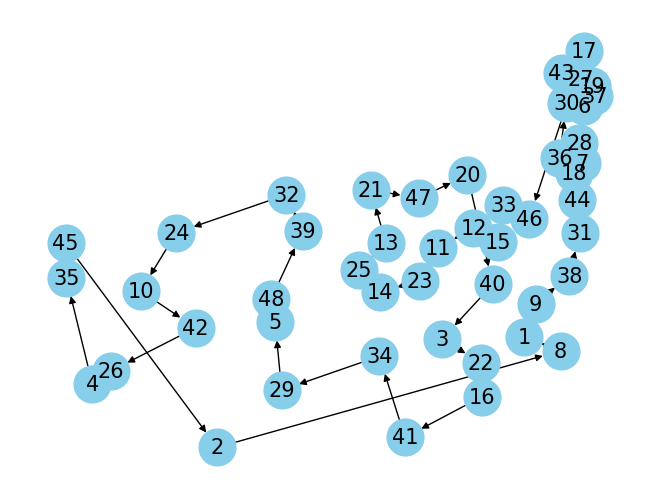

In [22]:
"""

Given certain input, it uses the greedy algorithm to plot a graph and output a file of the solution path
"""

class TSP:

    def __init__(self):
        """ TSP class containing data needed for networkx graph creation, file reading and file writing.
            Creates a graph for the traveling salesperon problem using the greedy algorithm
        """

        self.dimension = None
        self.nodeData = []
        self.graph = nx.DiGraph()
        self.coords = {}
        self.places = []
        self.route = []

    def extractData(self, inputFile=""):
        """
        Itterate through the input file and append each coordinate into the node list.
        Keyword Arguments:
            inputFile {str} -- a string for the file name (default: {""})
        """
        pairs = []
        for i,n in enumerate(inputFile.split()):
            if i == 0:
                self.dimension = int(n)
            else:
                pairs.append(int(n))
                if len(pairs) == 2:
                    self.nodeData.append(pairs)
                    pairs = []

        # Append any remaining pairs if the total number of coordinates is odd
        if pairs:
            self.nodeData.append(pairs)

        print(self.nodeData)


    def setUpCoords(self):
        """ Puts the coordinates for each node into a dictionary as a tuple with the node as the key """
        for node, coordinate in enumerate(self.nodeData):
            self.coords[node+1] = (coordinate[0], coordinate[1])
        print(self.coords)

    def calculateDistance(self, a, b):
        """calculates & returns the distance between points a and b
        Arguments:
            a {[tuple]} -- tuple of numbers for the x and y coordinate of a node
            b {[tuple]} -- tuple of numbers for the x and y coordinate of a node
        Returns:
            [float] -- the distance between the two points using the distance formula
        """
        return math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

    def getRoute(self, current, visits=[], nVisits=[], needList=True):
        """Makes a list of the nodes to be visited, in order, according to the greedy alogorithm for the TSP
        Arguments:
            current {int} -- the node to start at, not a list index
        Keyword Arguments:
            visits {list} -- list of places already visited (default: {[]})
            nVisits {list} -- list of places not visited (default: {[]})
            needList {bool} -- boolean deciding if the list of places not visited needs to be filled (default: {True})
        """
        bestTour = None
        bestDistance = float('inf')
        if needList:
            nVisits = self.listPlaces()
            self.cleanUpList(visits, nVisits)
        currentCity = current
        self.route.append(currentCity) # Add the starting city to the route
        visits.append(currentCity) # Mark the starting city as visited
        nVisits.remove(currentCity) # Remove the starting city from the list of unvisited cities

        while len(nVisits) > 0:
            bestTour = None # Resetting bestTour for each iteration
            bestDistance = float('inf') # Resetting bestDistance for each iteration
            for city in nVisits:
                distance = self.calculateDistance(self.coords[currentCity], self.coords[city])
                if distance < bestDistance:
                    bestDistance = distance
                    bestTour = city

            if bestTour is not None: # Check if a next city exists
                currentCity = bestTour
                self.route.append(currentCity)
                visits.append(currentCity)
                nVisits.remove(currentCity)

        return self.route


    def beGreedy(self, start):
        """ puts together the greedy algorithm. Gets the route order
        Arguments:
            start -- the starting node for the greedy algorithm
        """
        self.getRoute(start)
        self.route.append(self.route[0]) #Completes the tour
        print(self.route)

    def listPlaces(self):
        """makes a list of all the nodes/places from the dictionary
        Returns:
            [list] -- list of all the nodes/places
        """
        return list(self.coords.keys())


    def cleanUpList(self, visited, notVisited):
        """removes items in visited from notVisited
        Arguments:
            visited {list}
            notVisited {list}
        Returns:
            [list] -- a list of notVisited - visited
        """

        for item in visited:
            if item in notVisited:
                notVisited.remove(item)
        return notVisited

    def addNodes(self):
        """ adds nodes to the networkx graph
        """

        for everything in self.nodeData:
            # Assuming the node is the first element of the pair in nodeData
            node = self.nodeData.index(everything) + 1 # Use index + 1 as node number
            self.graph.add_node(node, pos=self.coords[node])


    def addEdges(self):
        """Adds graphs to the networkx graph
        """

        x = 0
        while x < len(self.route)-1:
            self.graph.add_edge(self.route[x], self.route[x+1],
                                weight=self.calculateDistance(self.coords[self.route[x]], self.coords[self.route[x+1]]))
            x += 1

    def showGraph(self):
        """Uses the imported libraries to display the graph
        """
        # get labels and coordinates for the graph
        coords = nx.get_node_attributes(self.graph, 'pos')
        # labels = nx.get_edge_attributes(self.graph, 'weight') # This might not be needed
        # draw nodes in their coordinates
        nx.draw(self.graph, coords, with_labels=True, node_color='skyblue', node_size=700, edge_color='k', linewidths=1, font_size=15)
        # draw edges with their weights
        # nx.draw_networkx_edge_labels(self.graph, coords, edge_labels=labels) # This might clutter the small graph
        plt.show()




def main():
    tsp = TSP()

    tsp.extractData(tspdata)
    tsp.setUpCoords()
    tsp.addNodes()
    tsp.beGreedy(1) # Starting from node 1
    tsp.addEdges()
    tsp.showGraph()


main()